<a href="https://colab.research.google.com/github/ChiNonsoHenry16/ChiNonsoHenry16/blob/main/SEABIR_Epidemic_Model_with_MLP_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the modelling and simulation virus propagation using epidemic SEABIR model and the applicaiton of Multilayer Perceptron to the generated the synthetic dataset generated. R squared values for the training and testing sets are used to evaluate model performance.

SEABIR model means susceptible (S), Exposed (E), symptomatic (A), asymptomatic (B), infected (I), and recovered (R), Susceptible individualscomputers (S).

In [1]:
#Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Define the mathematical model
def seabir_model(y, t, beta, sigma, alpha, gamma):
    S, E, A, B, I, R = y

    dS = -beta * S * (A + B + I)
    dE = beta * S * (A + B + I) - sigma * E
    dA = alpha * sigma * E - gamma * A
    dB = (1 - alpha) * sigma * E - gamma * B
    dI = gamma * (A + B) - gamma * I
    dR = gamma * I

    return [dS, dE, dA, dB, dI, dR]

In [3]:
# Parameters
beta = 0.3
sigma = 0.2
alpha = 0.6
gamma = 0.1

# Initial values: S, E, A, B, I, R
y0 = [0.99, 0.01, 0, 0, 0, 0]
t = np.linspace(0, 100, 500)

# Solve ODEs
solution = odeint(seabir_model, y0, t, args=(beta, sigma, alpha, gamma))

In [4]:
X = t.reshape(-1, 1)  # Input = time
y = solution          # Output = SEABIR states

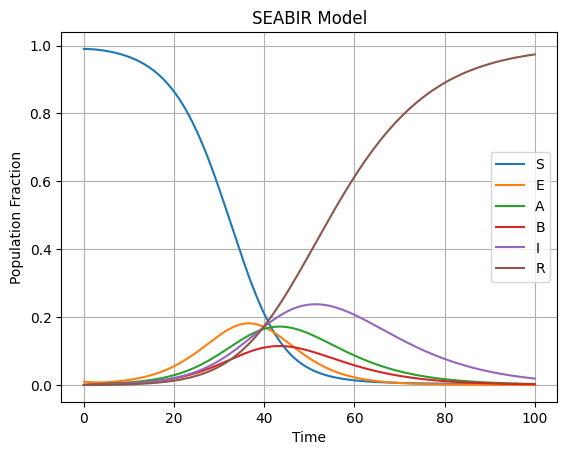

In [5]:
# Conduct simulation
labels = ['S', 'E', 'A', 'B', 'I', 'R']
for i in range(6):
    # Use the correct variable name 'solution' instead of 'result'
    plt.plot(t, solution[:, i], label=labels[i])
plt.xlabel('Time')
plt.ylabel('Population Fraction')
plt.title('SEABIR Model')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#Create the feed forward neural network model
model = MLPRegressor(hidden_layer_sizes=(10,), solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, random_state=42,
             solver='lbfgs')

In [8]:
# Predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

print("📊 ANN Evaluation Metrics")
print(f"Train MSE: {mse_train:.6f}, Train R²: {r2_train:.6f}")
print(f"Val   MSE: {mse_val:.6f}, Val   R²: {r2_val:.6f}")

📊 ANN Evaluation Metrics
Train MSE: 0.008723, Train R²: 0.330133
Val   MSE: 0.008209, Val   R²: 0.247185


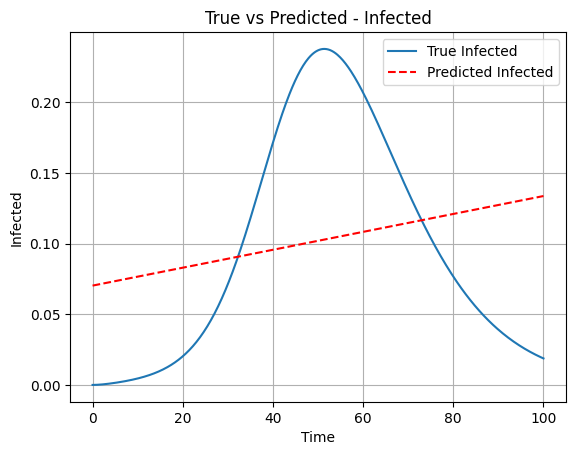

In [10]:
# Plotting the true and infected
y_full_pred = model.predict(X)

plt.plot(t, y[:, 4], label='True Infected')
plt.plot(t, y_full_pred[:, 4], 'r--', label='Predicted Infected')
plt.xlabel('Time')
plt.ylabel('Infected')
plt.title('True vs Predicted - Infected')
plt.legend()
plt.grid(True)
plt.show()

Judging by the R square values, the model did not perform so wonderful. In the future, better neural network models will be used for prediction. The dataset may also be increased so the model can be able to learn patterns in the target variable.